# Keras for Neural Networks

In [96]:
import numpy as np
import pandas as pd
# Import various componenets for model building
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop
# Import the backend
from keras import backend as K

In [97]:
import tensorflow as tf
import keras

In [98]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [99]:
import os 
animaltype_df=os.listdir('./desktop/train')

In [100]:
animaltype_df =os.listdir('./desktop/train')
def readfile(animals):
    tr_cat=filter(lambda x:x[:3]=='cat',Animal)
    tr_dog=filter(lambda x:x[:3]=='dog',Animal)
    #print(tr_cat)
    #print(type(tr_dog))
    return tr_cat,tr_dog

In [101]:
fast_run = False
image_width=40
image_height=40
image_size=(image_width, image_height)
image_channels=3

In [102]:
categories = []
for animal in animaltype_df:
    category = animal.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

animaltype_df = pd.DataFrame({
    'type': animal,
    'category': categories
})

In [103]:
# first 10 of our rows and columns
animaltype_df.head(9)

,type,category
0,cat.10148.jpg,1
1,cat.10148.jpg,0
2,cat.10148.jpg,1
3,cat.10148.jpg,0
4,cat.10148.jpg,0
5,cat.10148.jpg,0
6,cat.10148.jpg,1
7,cat.10148.jpg,0
8,cat.10148.jpg,0


In [104]:
# last 10 of our rows and columns
animaltype_df.tail(9)

,type,category
24991,cat.10148.jpg,0
24992,cat.10148.jpg,1
24993,cat.10148.jpg,0
24994,cat.10148.jpg,1
24995,cat.10148.jpg,1
24996,cat.10148.jpg,1
24997,cat.10148.jpg,1
24998,cat.10148.jpg,0
24999,cat.10148.jpg,0


In [105]:
animaltype_df.isnull()

,type,category
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24995,False,False
24996,False,False
24997,False,False
24998,False,False


In [106]:
#length of our observation
len(animaltype_df)

25000

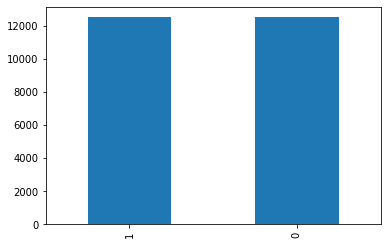

In [107]:
# According to our count plot graph we have 12000 dogs and 12000 cats.
animaltype_df['category'].value_counts().plot.bar()

In [108]:
# # sampler
# # data_df.sample?
# sample_df = animaltype_df.sample(
#     n=10000,
#     frac=None,
#     replace=False,
#     weights=None,
#     random_state=None,
#     axis=None,
# )

In [109]:
X = animaltype_df
y = animaltype_df

In [110]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state = 42)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 20000 samples.
Testing set has 5000 samples.


Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layerreduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer

Output Layer: It is the predicted values layer.

In [111]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, image_channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 38, 38, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 38, 38, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 19, 19, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 17, 17, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 17, 17, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)        

In [59]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to dog and 0 to cat

In [60]:
earlystop = EarlyStopping(patience=10)

In [61]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [62]:
callbacks = [earlystop, learning_rate_reduction]

In [64]:
animaltype_df["category"] = animaltype_df["category"].replace({0: 'cat', 1: 'dog'}) 


In [67]:
train_df, validate_df = train_test_split(animaltype_df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

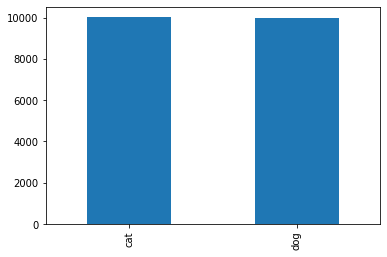

In [68]:
train_df['category'].value_counts().plot.bar()

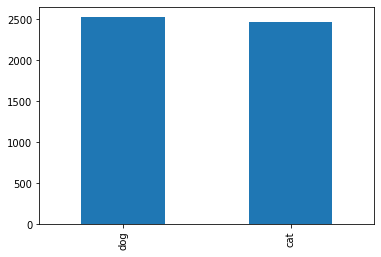

In [69]:
validate_df['category'].value_counts().plot.bar()

In [70]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Training Generator

In [85]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    './desktop/train', 
    x_col='type',
    y_col='category',
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


# Validation Generator

In [86]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    './desktop/train', 
    x_col='type',
    y_col='category',
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


# Testing our Generators

In [87]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    './desktop/train', 
    x_col='type',
    y_col='category',
    target_size=image_size,
    class_mode='categorical')

Found 1 validated image filenames belonging to 1 classes.


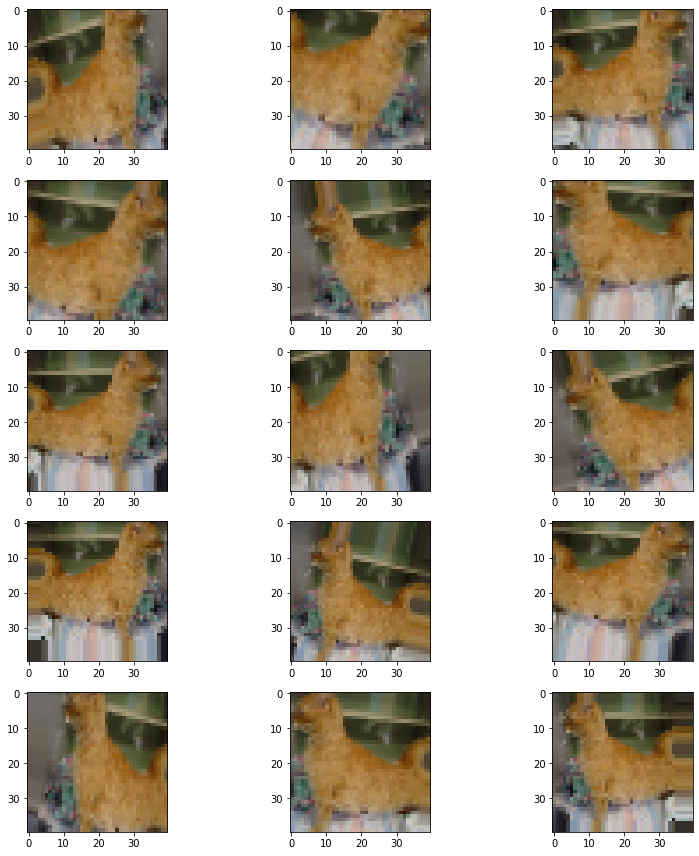

In [92]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

This picture looks like a cat.